<h2> make dataset like mnist <h2>

In [16]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import hog
from sklearn.externals import joblib
from ocr.helpers import implt, resize, ratio
from PIL import Image
from collections import defaultdict

# Import and resize

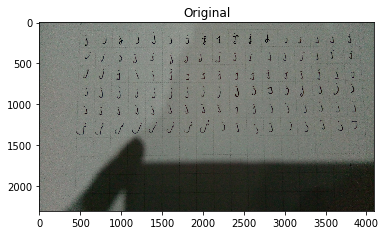

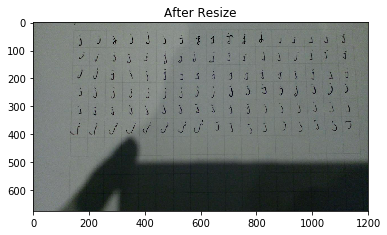

In [56]:
# resize image
huruf ='jj' # isi karacter
path_baru = 'F:/pkl/p19/new' # isi tempat folder simpan /save

if not os.path.exists(path_baru+'/'+huruf):
    os.makedirs(path_baru + '/'+huruf)
    
basewidth = 1200
im = Image.open('images/jj.jpg') # masukan gambar karacter
wpercent = (basewidth/float(im.size[0]))
hsize = int((float(im.size[1])*float(wpercent)))
img = im.resize((basewidth,hsize), Image.ANTIALIAS)
img.save('images/sompic.jpg') 

#import image
img = cv2.imread('images/sompic.jpg')

implt(im, 'gray', 'Original')
implt(img, 'gray', 'After Resize')

# Images Processing

(0,0,0): 78711 pixels
(255,255,255): 742 pixels


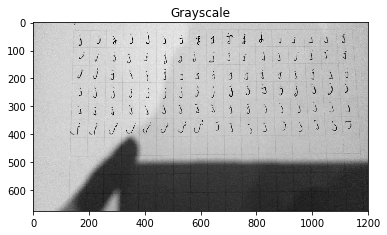

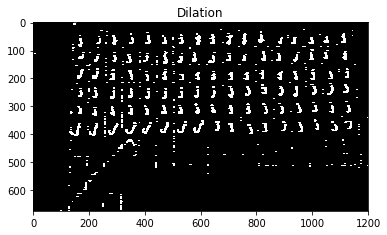

In [57]:
#grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
#threshold
# sharpen image
sharpen = cv2.GaussianBlur(gray, (0,0), 3)
sharpen = cv2.addWeighted(gray, 1.5, sharpen, -0.5, 0)

# apply adaptive threshold to get black and white effect
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 55, 15)

#background
pixels = thresh.reshape(-1,10)

counts = defaultdict(int)
for pixel in pixels:
    if pixel[0] == pixel[1] == pixel[2]:
        counts[pixel[0]] += 1

total_1 = 0
total_2 = 0

for index, pv in enumerate(sorted(counts.keys())):
    print("(%d,%d,%d): %d pixels" % (pv, pv, pv, counts[pv]))
    
    if index==0:
        total_1 = counts[pv]
    else:
        total_2 = counts[pv]
        
if total_2 > total_1:
    ret,thresh = cv2.threshold(gray,120,255,cv2.THRESH_BINARY_INV)

#dilation
kernel = np.ones((3,7), np.uint8)
#kernel = np.ones((15,20), np.uint8)  #khusus i,l,1 kecil
img_dilation = cv2.dilate(thresh, kernel, iterations=1)    

implt(gray, 'gray', 'Grayscale')
implt(img_dilation, 'gray', 'Dilation')
#cv2.imwrite("dilasi.jpg",img_dilation)

# Find Contours

In [58]:
#find contours
im2,ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0] + cv2.boundingRect(ctr)[1])

# Cropping

In [59]:
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
 
    # Getting ROI
    roi = thresh[y:y+h, x:x+w]
    
 
    # show ROI
    cv2.rectangle(img_dilation,(x,y),( x + w, y + h ),(0,255,0),1)
        #resize (28x 28)
    if w > 10 and h < 200:
        roi = cv2.resize(roi,(28,28))
        #cv2.imwrite('output\\{}.png'.format(i), roi)
        cv2.imwrite(path_baru + '\\' +huruf+'\\'+huruf+'{}.png'.format(i), roi)
        #implt(roi, 'gray', 'hasil')
 
#cv2.imwrite('result.png', img)
#implt(img, 'gray', 'show ROI')